### Demo for integration with the BabyARC engine

#### Imports

In [17]:
import os, sys
sys.path.append(os.path.join(os.path.dirname("__file__"), '..', '..'))
from reasoning.concept_env.BabyARC.code.dataset.dataset import *

# Demo Imports (You don't have to import these in case for running in a separate script)
from reasoning.util import get_root_dir
from reasoning.util import to_Variable_recur, visualize_dataset, visualize_matrices

# random seeds
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
# global vars
RUN_AS_CREATOR = False
ARC_OBJ_LOADED = False
DEMO_MAX_ARC_OBJS = 500
pp = pprint.PrettyPrinter(indent=4)
import logging
FORMAT = "%(asctime)-15s %(message)s"
logging.basicConfig(format=FORMAT, level=logging.DEBUG,
                    datefmt="%Y-%m-%d %H:%M")
logger = logging.getLogger(__name__)

#### Pre-loaded Object File

In [ ]:
try:
    arc_obj_dir = os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt')
    arc_objs = torch.load(arc_obj_dir)
    logger.info("SUCCESS! You loaded the pre-collected object file from ARC!")
    ARC_OBJ_LOADED = True
except:
    logger.info("Please check if obejct file in the directory indicated above!")
    logger.info(f"WARNING: Please get those pre-collected ARC objects in {arc_obj_dir}!")
    logger.info("You can download this file from: https://drive.google.com/file/d/1dZhT1cUFGvivJbSTwnqjou2uilLXffGY/view?usp=sharing")

#### Object Engine

In [ ]:
ObE = ObjectEngine()
# Below the log, it should shows how many objects it loads.
# Iso obj means the count of unique objects (considering rotations, color permutations, etc..)
_ = ObE.sample_objs_with_composite_shape(
    n=1, w_lims=[16,16], h_lims=[16,16], 
    rainbow_prob=0.0, chosen_concept="RectE1a",
    n_retry=30,
)
# If no error, that means you successfully sampled an object!

#### Object Engine sampling with ARC Objects

In [ ]:
ObE = ObjectEngine()
# Below the log, it should shows how many objects it loads.
# Iso obj means the count of unique objects (considering rotations, color permutations, etc..)
test_canvas = CanvasEngine().sameple_canvas()[0]
objs1 = ObE.sample_objs_with_composite_shape(
    n=1, w_lims=[16,16], h_lims=[16,16], 
    rainbow_prob=0.0, chosen_concept="RectE1a",
    n_retry=30,
)[0]
if objs1 != None:
    # Here is just one example with how you can sample different objects from the object engine!
    results = test_canvas.placement(objs1)
    if results == -1:
        logger.info("Placement step failed! Please rerun!")
    else:
        test_canvas.render(minimum_cover=False)
else:
    logger.info("Placement step failed! Please rerun!")

#### Canvas Engine

In [ ]:
test_canvas = CanvasEngine().sameple_canvas()[0]
objs1 = ObE.sample_objs_with_line(n=1, len_lims=[5,5], thickness=1, rainbow_prob=0.0, direction="h")
# Here is just one example with how you can sample different objects from the object engine!
results = test_canvas.placement(objs1[0])
if results == -1:
    logger.info("Placement step failed! Please rerun!")
else:
    test_canvas.render(minimum_cover=False)

In [ ]:
test_canvas = CanvasEngine().sameple_canvas()[0]
objs1 = ObE.sample_objs_with_l_shape(n=1, w_lims=[5,5], h_lims=[7,7], thickness=1, rainbow_prob=0.2, direction=3)[0]
objs1 = ObE.fix_color(objs1, 1)
# Here is just one example with how you can sample different objects from the object engine!
results = test_canvas.placement(objs1)
if results == -1:
    logger.info("Placement step failed! Please rerun!")
else:
    test_canvas.render(minimum_cover=False)

In [ ]:
# Random Objects.
test_canvas = CanvasEngine().sameple_canvas()[0]
objs1 = ObE.sample_objs_with_random_shape(n=1, w_lims=[4,4], h_lims=[4,4], rainbow_prob=0.0)[0]
objs1 = ObE.fix_color(objs1, 2)
# Here is just one example with how you can sample different objects from the object engine!
results = test_canvas.placement(objs1)
if results == -1:
    logger.info("Placement step failed! Please rerun!")
else:
    test_canvas.render(minimum_cover=False)

#### BabyARC Dataset

In [18]:
demo_dataset = \
    BabyARCDataset(
    pretrained_obj_cache=None,
    save_directory="./BabyARCDataset/", 
    object_limit=1, 
    noise_level=0, 
    canvas_size=16,
    skip_load_pretrain_obj=True,
) # canvas makes w=h canvas

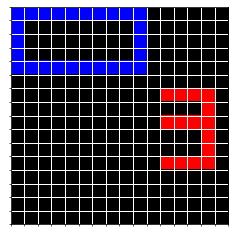

In [20]:
# Inplace object placement.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', 'obj_1'), 'IsNonOverlapXY'),
        ]
    ), 
    color_avail=[1,2],
    rainbow_prob=0.0,
    allow_connect=True, 
    parsing_check=True,
    concept_collection=["Eshape", "rectangle"],
)

In [ ]:
canvas_dict

In [ ]:
out_w = np.random.randint(5, 17)
out_h = np.random.randint(5, 17)
in_w = np.random.randint(4, out_w)
in_h = np.random.randint(4, out_h)
char_w = np.random.randint(3, 9)
char_h = np.random.randint(5, 9)
            
# Inplace object placement.
canvas_dict_1b = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', f'rectangle_[{out_w},{out_h}]'), 'Attr'), 
         (('obj_1', f'rectangle_[{in_w},{in_h}]'), 'Attr'), 
         (('obj_0', 'obj_1'), 'IsOutside'),
         (('obj_2', f'Eshape_[{char_w},{char_h}]'), 'Attr'),
         # (('obj_1', 'obj_2'), 'SameColor'),
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=True, 
    concept_collection=["Eshape"],
    large_shape=True,
    parsing_check=True,
)

In [ ]:
out_w = np.random.randint(5, 17)
out_h = np.random.randint(5, 17)
in_w = np.random.randint(4, out_w)
in_h = np.random.randint(4, out_h)
char_w = np.random.randint(3, 9)
char_h = np.random.randint(5, 9)
            
# Inplace object placement.
canvas_dict_1c = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', f'rectangle_[{out_w},{out_h}]'), 'Attr'), 
         (('obj_1', f'rectangle_[{in_w},{in_h}]'), 'Attr'), 
         (('obj_0', 'obj_1'), 'IsOutside'),
         (('obj_2', f'Eshape_[{char_w},{char_h}]'), 'Attr'),
         (('obj_1', 'obj_2'), 'SameColor'),
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=True, 
    concept_collection=["Eshape"],
    large_shape=True,
    parsing_check=True,
)

In [ ]:
out_w = np.random.randint(5, 17)
out_h = np.random.randint(5, 17)
in_w = np.random.randint(4, 8)
in_h = np.random.randint(4, 8)
char_w = np.random.randint(3, 8)
char_h = np.random.randint(5, 8)
            
# Inplace object placement.
canvas_dict_2b = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', f'rectangle_[{out_w},{out_h}]'), 'Attr'), 
         (('obj_1', f'rectangle_[{in_w},{in_h}]'), 'Attr'), 
         (('obj_0', 'obj_1'), 'IsOutside'),
         (('obj_2', f'Eshape_[{char_w},{char_h}]'), 'Attr'),
         (('obj_0', 'obj_2'), 'IsOutside'),
         # (('obj_1', 'obj_2'), 'SameColor'),
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=True, 
    concept_collection=["Eshape"],
    large_shape=True,
    parsing_check=True,
)

In [ ]:
out_w = np.random.randint(12, 17)
out_h = np.random.randint(12, 17)
in_w = np.random.randint(5, 8)
in_h = np.random.randint(5, 8)
char_w = np.random.randint(3, 8)
char_h = np.random.randint(5, 8)
            
# Inplace object placement.
canvas_dict_2c = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', f'rectangle_[{out_w},{out_h}]'), 'Attr'), 
         (('obj_1', f'rectangle_[{in_w},{in_h}]'), 'Attr'), 
         (('obj_0', 'obj_1'), 'IsOutside'),
         (('obj_2', f'Eshape_[{char_w},{char_h}]'), 'Attr'),
         (('obj_0', 'obj_2'), 'IsOutside'),
         (('obj_1', 'obj_2'), 'SameColor'),
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=True, 
    concept_collection=["Eshape"],
    large_shape=True,
    parsing_check=True,
)

In [ ]:
out_w = np.random.randint(9, 17)
out_h = np.random.randint(9, 17)
in_w = np.random.randint(7, out_w-1)
in_h = np.random.randint(7, out_h-1)
char_w = np.random.randint(3, in_w-1)
char_h = np.random.randint(5, in_h-1)
            
# Inplace object placement.
canvas_dict_3b = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [
         (('obj_0', f'rectangle_[{out_w},{out_h}]'), 'Attr'), 
         (('obj_1', f'rectangle_[{in_w},{in_h}]'), 'Attr'), 
         (('obj_0', 'obj_1'), 'IsOutside'),
         (('obj_2', f'Eshape_[{char_w},{char_h}]'), 'Attr'), 
         (('obj_1', 'obj_2'), 'IsOutside'),
         # (('obj_1', 'obj_2'), 'SameColor'),
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=True, 
    concept_collection=["Ashape"],
    large_shape=True,
    parsing_check=True,
    axis_off=True
)


In [ ]:
out_w = np.random.randint(9, 17)
out_h = np.random.randint(9, 17)
in_w = np.random.randint(7, out_w-1)
in_h = np.random.randint(7, out_h-1)
char_w = np.random.randint(3, in_w-1)
char_h = np.random.randint(5, in_h-1)
            
# Inplace object placement.
canvas_dict_3c = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [
         (('obj_0', f'rectangle_[{out_w},{out_h}]'), 'Attr'), 
         (('obj_1', f'rectangle_[{in_w},{in_h}]'), 'Attr'), 
         (('obj_0', 'obj_1'), 'IsOutside'),
         (('obj_2', f'Eshape_[{char_w},{char_h}]'), 'Attr'), 
         (('obj_1', 'obj_2'), 'IsOutside'),
         # (('obj_1', 'obj_2'), 'SameColor'),
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=True, 
    concept_collection=["Ashape"],
    large_shape=True,
    parsing_check=True,
    axis_off=True
)


In [ ]:
# Inplace object placement.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', 'rectangle_[10,12]'), 'Attr'), 
         (('obj_1', 'rectangle_[6,6]'), 'Attr'), 
         (('obj_1', 'obj_0'), 'IsInside'),
         (('obj_2', 'Ashape_[3,6]'), 'Attr'),
         (('obj_1', 'obj_2'), 'SameColor'),
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=False, 
    concept_collection=["Eshape"],
    large_shape=True,
    parsing_check=True,
    is_plot=True,
)
if canvas_dict != -1:
    mid_ax_y_l = canvas_dict["id_position_map"][1][0].tolist() + (canvas_dict["id_object_map"][1].shape[0])//2
    mid_ax_x_l = canvas_dict["id_position_map"][1][1].tolist() + (canvas_dict["id_object_map"][1].shape[1])//2

    mid_ax_y_r = canvas_dict["id_position_map"][2][0].tolist() + (canvas_dict["id_object_map"][2].shape[0])//2
    mid_ax_x_r = canvas_dict["id_position_map"][2][1].tolist() + (canvas_dict["id_object_map"][2].shape[1])//2
    
    if abs(mid_ax_y_l-mid_ax_y_r) <= 2 or abs(mid_ax_x_l-mid_ax_x_r) <= 2:
        failed = False
        if ('obj_2', 'obj_0') in canvas_dict["partial_relation_edges"]:
            if "IsInside" in canvas_dict["partial_relation_edges"][('obj_2', 'obj_0')]:
                failed = True
        if ('obj_2', 'obj_1') in canvas_dict["partial_relation_edges"]:
            if "IsInside" in canvas_dict["partial_relation_edges"][('obj_2', 'obj_1')]:
                failed = True
        if not failed:
            in_canvas = Canvas(
                repre_dict=canvas_dict
            )
            in_canvas.render()

In [ ]:
canvas_dict

In [ ]:
# Inplace object placement.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', 'rectangle_[10,10]'), 'Attr'), 
         (('obj_1', 'Eshape_[3,6]'), 'Attr'),
         (('obj_1', 'obj_0'), 'IsInside'),
         (('obj_2', 'rectangle_[3,3]'), 'Attr'), 
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=False, 
    concept_collection=["Eshape"],
    large_shape=True
)

In [ ]:
# Inplace object placement.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', 'rectangle_[10,10]'), 'Attr'), 
         (('obj_1', 'Eshape_[3,6]'), 'Attr'),
         (('obj_2', 'rectangle_[3,3]'), 'Attr'), 
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=False, 
    concept_collection=["Eshape"],
    large_shape=True
)

In [ ]:
# Inplace object placement.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict(
        [(('obj_0', 'rectangle_[13,13]'), 'Attr'), 
         (('obj_1', 'rectangle_[9,9]'), 'Attr'), 
         (('obj_2', 'obj_1'), 'IsInside'), 
        ]
    ), 
    color_avail=[1,2,3,4,5,6,7,8,9],
    rainbow_prob=0.0,
    allow_connect=False, 
    concept_collection=["Eshape"],
    large_shape=True
)

In [ ]:
# With fixed color collections.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'rectangleSolid_[-1,-1]'), 'Attr')
                ]), 
    allow_connect=True, 
    color_avail=[1,2,3],
    rainbow_prob=0.0,
)

In [ ]:
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'rectangleSolid_[-1,-1]'), 'Attr')
                ]), 
    allow_connect=True, 
    color_collection=None,
    rainbow_prob=0.0,
)

In [ ]:
########################################################
# Some current supported DSLs in relational canvas.
# ('obj_*', 'color_[c]'), 'Attr')
# ('obj_*', 'pos_[i,j]'), 'Attr')
# ('obj_*', 'boundary_attachment_[b({0(u),1(r),2(l),3(l)})]'), 'Attr')
# ('obj_*', 'pixel'), 'Attr')
# ('obj_*', 'line_[l,t,d({-1,0(v),1(h)})]'), 'Attr')
# ('obj_*', 'reactangle_[w,h]'), 'Attr')
# ('obj_*', 'enclosure_[w,h,g({-1,0(ng),1(g)})]'), 'Attr')
# ('obj_*', 'obj_*'), '[AnyRelation]')
########################################################

In [ ]:
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, 
                   canvas_size=8) # canvas makes w=h canvas

In [ ]:
# If this does not return, simply rerun!
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'obj_1'), 'SameColor')]),
    allow_connect=True, 
    color_avail=[1],
    rainbow_prob=0.0,
)

In [ ]:
# Another case for vertical and horizontal lines.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'line_[6,1,0]'), 'Attr'), 
                 (('obj_1', 'line_[7,1,1]'), 'Attr')]), 
    allow_connect=True,
    color_avail=[1,2,3],
    rainbow_prob=0.0,
)

In [ ]:
# More complex relations.
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'line_[5,1,0]'), 'Attr'), 
                 (('obj_1', 'line_[7,1,0]'), 'Attr'),
                 (('obj_0', 'boundary_attachment_[2]'), 'Attr'),
                 (('obj_1', 'boundary_attachment_[2]'), 'Attr')]), 
    color_collection=[1,2,3],
    rainbow_prob=0.0,
)

#### Massive generation checks

In [ ]:
# Sanity Check
dataset = BabyARCDataset(
    pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
    save_directory=get_root_dir() + "/concept_env/BabyARCDataset/", 
    object_limit=0,
    noise_level=0, 
    canvas_size=8,
)
mode = "Line"
examples_all = []
masks_all = []
concepts_all = []
max_n_objs = 3
if mode == "Line":
    for i in range(10000):
        n_objs = np.random.randint(max_n_objs+1)
        List = [(('obj_{}'.format(i), 'line_[-1,1,-1]'), 'Attr') for i in range(n_objs)]
        canvas_dict = dataset.sample_single_canvas_by_core_edges(
            OrderedDict(List))
        if canvas_dict != -1:
            n_sampled_objs = len(canvas_dict['id_object_mask'])
            assert n_sampled_objs == n_objs
            examples_all += [canvas_dict["image_t"]] * n_sampled_objs
            masks_all += list(canvas_dict['id_object_mask'].values())
            concepts_all += ["Line"] * n_sampled_objs

In [ ]:
# using dataset interface to sample canvas now.
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=8)

In [ ]:
repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'randomShape_[2,4]'), 'Attr')]), 
    allow_connect=True, is_plot=False, rainbow_prob=0.0
)
if repre_dict_1 == -1:
    print("CANVAS FAILED!")
else:
    in_canvas_1 = Canvas(
        repre_dict=repre_dict_1
    )
    in_canvas_1.render()

#### BabyARC with Rotation Operator

In [ ]:
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=20)

repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'line_[6,1,0]'), 'Attr'), 
                 (('obj_1', 'line_[7,1,1]'), 'Attr')]), 
    allow_connect=True, is_plot=False
)
in_canvas_1 = Canvas(
    repre_dict=repre_dict_1
)

repre_dict_2 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'line_[6,1,0]'), 'Attr'), 
                 (('obj_1', 'line_[7,1,1]'), 'Attr')]), 
    allow_connect=True, is_plot=False
)
in_canvas_2 = Canvas(
    repre_dict=repre_dict_2
)

if in_canvas_1 == -1 or in_canvas_2 == -1:
    print("CANVAS FAILED!")

out_canvas_list, _ = OperatorEngine().operate_rotate(
    [in_canvas_1, in_canvas_2], [["obj_0"], ["obj_1"]],
    operator_tag="#RotateA", 
    allow_connect=True, allow_shape_break=False
)
if out_canvas_list == -1:
    print("OPERATOR FAILED!")

In [ ]:
_ = in_canvas_1.render()

In [ ]:
_ = out_canvas_list[0].render()

#### Relations and different options (e.g., shape break option)

In [ ]:
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=10)

repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'line_[6,1,0]'), 'Attr'), 
                 (('obj_1', 'line_[7,1,1]'), 'Attr')]), 
    allow_connect=True, is_plot=False
)
in_canvas_1 = Canvas(
    repre_dict=repre_dict_1
)

repre_dict_2 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'line_[6,1,0]'), 'Attr'), 
                 (('obj_1', 'line_[7,1,1]'), 'Attr')]), 
    allow_connect=True, is_plot=False
)
in_canvas_2 = Canvas(
    repre_dict=repre_dict_2
)

if in_canvas_1 == -1 or in_canvas_2 == -1:
    print("CANVAS FAILED!")

out_canvas_list, _ = OperatorEngine().operate_rotate(
    [in_canvas_1, in_canvas_2], [["obj_0"], ["obj_1"]],
    operator_tag="#RotateA", 
    allow_connect=True, allow_shape_break=True
)
if out_canvas_list == -1:
    print("OPERATOR FAILED!")

In [ ]:
_ = in_canvas_1.render()

In [ ]:
_ = out_canvas_list[0].render()

#### Lshape

In [ ]:
# Lshape
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=5)

# multiple L shapes
repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'Lshape_[2,3,0]'), 'Attr'),
                 (('obj_1', 'Lshape_[2,3,3]'), 'Attr'),
                 (('obj_2', 'Lshape_[2,3,1]'), 'Attr')
                ]), 
    allow_connect=True, is_plot=True, rainbow_prob=0.0
)
in_canvas_1 = Canvas(
    repre_dict=repre_dict_1
)

#### Symmetry shape

In [ ]:
# Symmetry objects
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=10)

In [ ]:
repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'symmetry_[4,6]_[0]'), 'Attr')]), # the second list the symmetry axis [0 (-), 1(|), 2(\), 3(/)]
    allow_connect=True, is_plot=True, rainbow_prob=0.0
)

#### ARC shape

In [ ]:
# Identity operator
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=None, noise_level=0, canvas_size=8)

In [ ]:
# multiple L shapes
repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'arcShape_[4,4]'), 'Attr')]), 
    allow_connect=True, is_plot=True, rainbow_prob=0.0
)
in_canvas_1 = Canvas(
    repre_dict=repre_dict_1
)
_ = in_canvas_1.render()

#### Demo for outputs

In [ ]:
# Lshape
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=5)

# multiple L shapes
repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'Lshape_[2,3,0]'), 'Attr'),
                 (('obj_1', 'Lshape_[2,3,3]'), 'Attr'),
                 (('obj_2', 'Lshape_[2,3,1]'), 'Attr')
                ]), 
    allow_connect=True, is_plot=True, rainbow_prob=0.0
)
in_canvas_1 = Canvas(
    repre_dict=repre_dict_1
)

In [ ]:
# you can also load a canvas by a single image tensor!
arc_canvas_dict = demo_dataset.sample_task_canvas_from_arc(repre_dict_1["image_t"]) # as a image tensor

In [ ]:
arc_canvas_dict

#### Operator: Identity

In [ ]:
# Identity operator
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=10)

In [ ]:
# multiple L shapes
repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'Lshape_[2,3,0]'), 'Attr'),
                 (('obj_1', 'Lshape_[2,3,3]'), 'Attr'),
                 (('obj_2', 'Lshape_[2,3,1]'), 'Attr')
                ]), 
    allow_connect=True, is_plot=True, rainbow_prob=0.0
)
in_canvas_1 = Canvas(
    repre_dict=repre_dict_1
)

In [ ]:
out_canvas_list, _ = OperatorEngine().operator_identity(
    [in_canvas_1], [["obj_0"]],
    inplace=False
)
if out_canvas_list == -1:
    print("OPERATOR FAILED!")
_ = out_canvas_list[0].render()

In [ ]:
out_canvas_list[0].repr_as_dict()

In [ ]:
_ = in_canvas_1.render()

#### Operator: Move

In [ ]:
# move operator
# this can also be used to mimic object chasing etc..
out_canvas_list, _ = OperatorEngine().operator_move(
    [in_canvas_1], [["obj_0"]], [[OperatorMoveSpec(autonomous=False,
                                                   direction=1, 
                                                   distance=-1, 
                                                   hit_type=None, # either wall or agent
                                                   linkage_move=False, 
                                                   linkage_move_distance_ratio=None
                                                  )]], 
    allow_overlap=False, 
    allow_shape_break=True,
    allow_connect=True,
)
if out_canvas_list == -1:
    print("OPERATOR FAILED!")

In [ ]:
_ = out_canvas_list[0].render()

In [ ]:
# we can add a second ops on this initermediate output canvas
out_canvas_list_2, _ = OperatorEngine().operate_rotate(
    [out_canvas_list[0]], [["obj_1"]],
    operator_tag="#RotateA", 
    allow_connect=True, allow_shape_break=False
)
if out_canvas_list_2 == -1:
    print("OPERATOR FAILED!")
_ = out_canvas_list_2[0].render()

#### Relation: relation and concept collection based sampling

In [ ]:
# More relation with BabyARC objects
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=16)

In [ ]:
# You can change the first order relation here with the following options:
"""
"SameAll", "SameShape", "SameColor", "SameRow", "SameCol", "IsInside", "IsTouch"

concept_collection will constraint the kind of shape you will see.
"""
canvas_dict = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'obj_1'), 'IsTouch')
                ]), 
    allow_connect=True, rainbow_prob=0.0, 
    concept_collection=["line", "randomShape"], 
    is_plot=True
)
if canvas_dict == -1:
    print("CANVAS PLACEMENT FAILED!")

In [ ]:
canvas_dict

In [ ]:
# Same Color + IsTouch + Move
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=8)

In [ ]:
repre_dict_1 = demo_dataset.sample_single_canvas_by_core_edges(
    OrderedDict([(('obj_0', 'obj_1'), 'IsTouch')
                ]), 
    allow_connect=True, rainbow_prob=0.0, 
    concept_collection=["Fshape"], 
    is_plot=True
)
if repre_dict_1 == -1:
    print("CANVAS PLACEMENT FAILED!")
else:
    in_canvas_1 = Canvas(
        repre_dict=repre_dict_1
    )

In [ ]:
out_canvas_list, _ = OperatorEngine().operator_move(
    [in_canvas_1], [["obj_0"]], [[OperatorMoveSpec(autonomous=False,
                                                   direction=1, 
                                                   distance=-1, 
                                                   hit_type=None, # either wall or agent
                                                   linkage_move=False, 
                                                   linkage_move_distance_ratio=None
                                                  )]], 
    allow_overlap=False, 
    allow_shape_break=True,
    allow_connect=True,
)
if out_canvas_list == -1:
    print("OPERATOR FAILED!")
else:
    _ = out_canvas_list[0].render()

#### Selector tasks

In [ ]:
# Same Color + IsTouch + Move
dataset_engine = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=8)

In [ ]:
def generate_babyarc_selector_task(
    dataset_engine,
    selector_dict,
    concept_collection=["line", "Lshape", "rectangle", "rectangleSolid"],
    is_plot=False,
):

    canvas_dict = dataset_engine.sample_single_canvas_by_core_edges(
        selector_dict,
        allow_connect=True, is_plot=False, rainbow_prob=0.0,
        concept_collection=concept_collection,
    )
    if canvas_dict == -1:
        return -1
    else:
        if is_plot:
            canvas = Canvas(
                repre_dict=canvas_dict
            )
            canvas.render()

    return_dict = OrderedDict({
        "obj_masks" : {},
        "obj_relations" : {},
    })
    for k, v in canvas_dict["node_id_map"].items():
        return_dict["obj_masks"][k] = canvas_dict["id_object_mask"][v]
    return_dict["obj_relations"] = canvas_dict["partial_relation_edges"]
    return_dict["image_t"] = canvas_dict["image_t"]
    return return_dict

In [ ]:
return_dict = generate_babyarc_selector_task(
    dataset_engine,
    selector_dict=OrderedDict(
        [(('obj_0', 'obj_1'), 'IsInside'),
         (('obj_0', 'obj_2'), 'SameShape')
        ]
    ),
    concept_collection=["line", "Lshape"],
    is_plot=True,
)
if return_dict == -1:
    print("Generation failed!")

In [ ]:
canvas_dict

#### 1 Selector + 1 Operator

In [ ]:
def generate_babyarc_task(
    dataset_engine,
    operator_engine,
    canvas_relation,
    allow_connect=True, 
    rainbow_prob=0.0, 
    example_count=3,
    operator="Move", 
    canvas_size=8,
    concept_collection=["line", "Lshape", "rectangle", "rectangleSolid"],
    is_torch=True,
    debug=False,
    parsing_check=False,
    single_obj_only=True,
    must_change_check=True,
):
    # Generate canvas in.
    repre_dict_list = []
    in_canvas_list = []
    for i in range(example_count):
        repre_dict = dataset_engine.sample_single_canvas_by_core_edges(
            canvas_relation, 
            allow_connect=True, rainbow_prob=0.0, 
            concept_collection=["line", "Lshape", "rectangle", "rectangleSolid"], 
            is_plot=False,
            parsing_check=parsing_check
        )
        if repre_dict == -1:
            return -1, None, None
        repre_dict_list.append(repre_dict)
        in_canvas = Canvas(
            repre_dict=repre_dict
        )
        in_canvas_list.append(in_canvas)

    # Find common patterns.
    pattern_selector_candidates = operator_engine.select_by_common_referred_patterns(
        in_canvas_list
    )
    random.shuffle(pattern_selector_candidates)
    found = False
    if single_obj_only:
        for p_s_c in pattern_selector_candidates:
            _len = set([])
            for s_o in p_s_c:
                _len.add(len(s_o))
            if len(_len) == 1 and list(_len)[0] == 1:
                pattern_selector = p_s_c
                found = True
                break
    else:
        # Randomly sample one.
        pattern_selector = random.choice(pattern_selector_candidates)
    if not found:
        return -1, None, None
    
    operator_type = None
    out_repre_dict_list = []
    if operator == "Move":
        operator_spec = OperatorMoveSpec(autonomous=False,
           direction=random.randint(0,3), 
           distance=random.randint(1, canvas_size//2), 
           hit_type=None, # either wall or agent
           linkage_move=False, 
           linkage_move_distance_ratio=None
        )
        
        canvas_idx = 0
        for in_canvas in in_canvas_list:
            out_canvas, _ = operator_engine.operator_move(
                [in_canvas], [pattern_selector[canvas_idx]], 
                [[operator_spec]*len(pattern_selector[canvas_idx])], 
                allow_overlap=False, 
                allow_shape_break=False,
                allow_connect=allow_connect,
            )
            if out_canvas == -1:
                return -1, None, None
            out_canvas = out_canvas[0]
            out_repre_dict_list.append(out_canvas.repr_as_dict())
            canvas_idx += 1
    elif operator == "Rotate":
        canvas_idx = 0
        rotate_types = ["RotateA", "RotateB", "RotateC", "hFlip", "vFlip", "DiagFlipA", "DiagFlipB"]
        operator_type = random.choice(rotate_types)
        for in_canvas in in_canvas_list:
            out_canvas, _ = operator_engine.operate_rotate(
                [in_canvas], [pattern_selector[canvas_idx]],
                operator_tag=f"#{operator_type}", 
                allow_connect=True, 
                allow_shape_break=False,
            )
            if out_canvas == -1:
                return -1, None, None
            out_canvas = out_canvas[0]
            out_repre_dict_list.append(out_canvas.repr_as_dict())
            canvas_idx += 1

    if debug:
        print(repre_dict_list)
        print(pattern_selector)
    
    # Consolidate outpus.
    input_images = []
    for in_dict in repre_dict_list:
        input_images.append(in_dict['image_t'])
    output_images = []
    for out_dict in out_repre_dict_list:
        output_images.append(out_dict['image_t'])
    
    if must_change_check:
        # We need to see all canvas changed after operating.
        for i in range(len(input_images)):
            if torch.equal(input_images[i], output_images[i]):
                return -1, None, None
    
    # Generate ARC json format.
    generated_task = (input_images, output_images)
    task_json = {}
    train = []
    test = []
    for i in range(len(generated_task[0])):
        _in = np.int_(generated_task[0][i].numpy()).tolist()
        _out = np.int_(generated_task[1][i].numpy()).tolist()
        if i == len(generated_task[0]) - 1: # We default this as the test.
            test.append({
                'input':_in,
                'output':_out
            })
        else:
            train.append({
                'input':_in,
                'output':_out
            })
    task_json = {
        'test':test,
        'train':train
    }
    if is_torch:
        task_json = to_Variable_recur(task_json, type="long")
    return task_json, pattern_selector, operator_type

In [ ]:
# slightly modified this as in util
def visualize_dataset(dataset, filename=None, is_show=True, title=None, test_output=False, **kwargs):
    def to_value(input):
        if not isinstance(input, torch.Tensor):
            input = input.get_node_value()
        return input
    length = len(dataset["train"]) + 1
    plt.figure(figsize=(7, 3.5 * (length)))
    for i, data in enumerate(dataset["train"]):
        visualize_matrices(
            [to_value(data["input"]), to_value(data["output"])], 
            num_rows=length, row=i, plt=plt, is_show=is_show, 
            title=title if i == 0 else None
        )
    if "test" in dataset:
        if test_output:
            visualize_matrices(
                [to_value(dataset["test"][0]["input"]), 
                 to_value(dataset["test"][0]["output"])], 
                images_per_row=2, num_rows=length, row=i+1, 
                plt=plt, is_show=is_show
            )
        else:
            visualize_matrices(
                [to_value(dataset["test"][0]["input"])], 
                images_per_row=2, num_rows=length, row=i+1, 
                plt=plt, is_show=is_show
            )
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight", **kwargs)
    if is_show:
        plt.show()

In [ ]:
# More relation with BabyARC objects
demo_dataset = \
    BabyARCDataset(pretrained_obj_cache=os.path.join(get_root_dir(), 'concept_env/datasets/arc_objs.pt'),
                   save_directory="./BabyARCDataset/", 
                   object_limit=1, noise_level=0, canvas_size=8)

In [ ]:
task_concepts = OrderedDict({})
ensembled_tasks = OrderedDict({})
rel_pool = ["SameAll", "SameShape", "SameColor", "SameRow", "SameCol", "IsInside", "IsTouch"]

In [ ]:
task_idx = 0
max_itr = 1000000
for i in range(max_itr):
    
    rel1 = random.choice(rel_pool)
    rel2 = random.choice(list(set(rel_pool) - set([rel1])))
    relations = OrderedDict([(('obj_0', 'obj_1'), rel1),
                             (('obj_0', 'obj_2'), rel2)
                            ])
    generated_task, pattern_selector, operator_type = generate_babyarc_task(
        demo_dataset,
        OperatorEngine(),
        relations,
        operator="Rotate",
        example_count=3,
        debug=False,
        parsing_check=True,
        single_obj_only=True,
    )
    if generated_task != -1:
        task_concepts[task_idx] = {
            "relations": relations,
            "operators": [operator_type]
        }
        if len(ensembled_tasks) % 100 == 0:
            print(f"generating #{len(ensembled_tasks)} tasks ...")
        ensembled_tasks[task_idx] = copy.deepcopy(generated_task)
        task_idx += 1
        if task_idx == 10000:
            # Complete!
            break

In [ ]:
operator = "rotate"
json_dump_tasks_path = f"./datasets/{operator}-tasks.json"
json_dump_concepts_path = f"./datasets/{operator}-concepts.json"
torch.save(ensembled_tasks, json_dump_tasks_path)
torch.save(task_concepts, json_dump_concepts_path)

In [ ]:
for task_idx, task in ensembled_tasks.items():
    relations = "+".join([v for v in task_concepts[task_idx]["relations"].values()])
    operators = "+".join(task_concepts[task_idx]["operators"])
    encode_str = f"id_{task_idx}_{relations}+{operators}"
    output_path = "./datasets/babyARC_lv1/" + encode_str + ".png"
    # generated_task = to_Variable_recur(task, type="long"),
    visualize_dataset(
        task,
        filename=output_path,
        test_output=False,
        debug=False,
        is_show=False,
    )

In [ ]:
generated_task = to_Variable_recur(generated_task, type="long")
visualize_dataset(
    ensembled_tasks[0],
    test_output=True,
    debug=True
)

In [ ]:
# These codes are for debugging purposes!
dataset_engine = demo_dataset
operator_engine = OperatorEngine()
canvas_relation = OrderedDict([(('obj_0', 'obj_1'), 'IsInside'),
             (('obj_0', 'obj_2'), 'SameShape'),
            ])
example_count=3
debug=False
parsing_check=True
operator = "Move"
canvas_size = 8
allow_connect=True
is_torch=True

for i in range(100):

    # Generate canvas in.
    repre_dict_list = []
    in_canvas_list = []
    for i in range(example_count):
        repre_dict = dataset_engine.sample_single_canvas_by_core_edges(
            canvas_relation, 
            allow_connect=True, rainbow_prob=0.0, 
            concept_collection=["line", "Lshape", "rectangle", "rectangleSolid"], 
            is_plot=False,
            parsing_check=parsing_check
        )
        if repre_dict == -1:
            break
        repre_dict_list.append(repre_dict)
        in_canvas = Canvas(
            repre_dict=repre_dict
        )
        in_canvas_list.append(in_canvas)

    if repre_dict == -1:
        continue
        
    # Find common patterns.
    pattern_selector_candidates = operator_engine.select_by_common_referred_patterns(
        in_canvas_list
    )
    # Randomly sample one.
    pattern_selector = random.choice(pattern_selector_candidates)
    out_repre_dict_list = []
    if operator == "Move":
        operator_spec = OperatorMoveSpec(autonomous=False,
           direction=random.randint(0,3), 
           distance=random.randint(1, canvas_size//2), 
           hit_type=None, # either wall or agent
           linkage_move=False, 
           linkage_move_distance_ratio=None
        )

        canvas_idx = 0
        for in_canvas in in_canvas_list:
            out_canvas, _ = operator_engine.operator_move(
                [in_canvas], [pattern_selector[canvas_idx]], 
                [[operator_spec]*len(pattern_selector[canvas_idx])], 
                allow_overlap=False, 
                allow_shape_break=False,
                allow_connect=allow_connect,
            )
            if out_canvas == -1:
                break
            out_canvas = out_canvas[0]
            out_repre_dict_list.append(out_canvas.repr_as_dict())
            canvas_idx += 1
    else:
        print("Not implemented.")
        break

    if out_canvas == -1:
        continue
        
    if debug:
        print(repre_dict_list)
        print(pattern_selector)

    # Consolidate outpus.
    input_images = []
    for in_dict in repre_dict_list:
        input_images.append(in_dict['image_t'])
    output_images = []
    for out_dict in out_repre_dict_list:
        output_images.append(out_dict['image_t'])
        
    # Generate ARC json format.
    generated_task = (input_images, output_images)

    
    task_json = {}
    train = []
    test = []
    for i in range(len(generated_task[0])):
        _in = np.int_(generated_task[0][i].numpy()).tolist()
        _out = np.int_(generated_task[1][i].numpy()).tolist()
        if i == len(generated_task[0]) - 1: # We default this as the test.
            test.append({
                'input':_in,
                'output':_out
            })
        else:
            train.append({
                'input':_in,
                'output':_out
            })
    task_json = {
        'test':test,
        'train':train
    }
    if is_torch:
        task_json = to_Variable_recur(task_json, type="long")
        
    if generated_task != -1:
        len_s = []
        for p in pattern_selector:
            len_s += [len(p)]
        if len(set(len_s)) != 1:
            break

In [ ]:
# generated_task = to_Variable_recur(generated_task, type="long")
visualize_dataset(
    task_json,
    test_output=True,
    debug=True
)